# IMDB 리뷰 데이터 셋



# LSTM과 GPU 셀

In [14]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤시드 적용
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

# LSTM 신경망 훈련하기

In [15]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

In [16]:
(train_input,train_target),(test_input,test_target) = imdb.load_data(num_words = 500)
train_input,val_input,train_target,val_target = train_test_split(train_input,train_target,test_size=0.2,random_state=42)

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input,maxlen=100)
val_seq = pad_sequences(val_input,maxlen=100)

In [20]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_5 (LSTM)               (None, 8)                 800       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 44ms/step - loss: 0.6927 - accuracy: 0.5277 - val_loss: 0.6924 - val_accuracy: 0.5368
Epoch 2/100
  7/313 [..............................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5670

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 5s 16ms/step - loss: 0.6916 - accuracy: 0.5677 - val_loss: 0.6911 - val_accuracy: 0.5668
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6896 - accuracy: 0.6011 - val_loss: 0.6883 - val_accuracy: 0.6062
Epoch 4/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6842 - accuracy: 0.6363 - val_loss: 0.6792 - val_accuracy: 0.6618
Epoch 5/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6589 - accuracy: 0.6827 - val_loss: 0.6277 - val_accuracy: 0.7076
Epoch 6/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6084 - accuracy: 0.7135 - val_loss: 0.5964 - val_accuracy: 0.7114
Epoch 7/100
313/313 [==============================] - 6s 21ms/step - loss: 0.5834 - accuracy: 0.7280 - val_loss: 0.5746 - val_accuracy: 0.7330
Epoch 8/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5617 - accuracy: 0.7452 - val_loss: 0.5553 - val_accuracy: 0.7452
Epoc

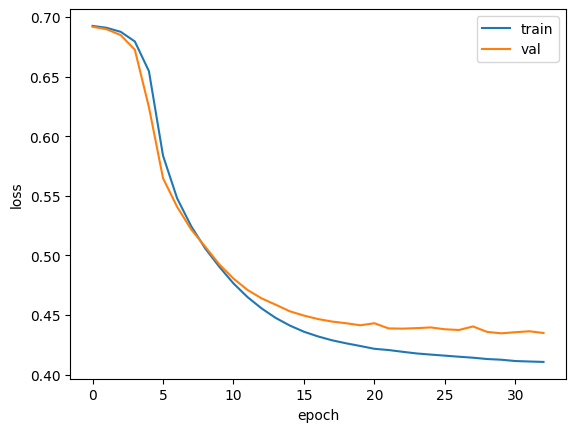

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# 순환층에 드롭아웃 적용하기

In [21]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.LSTM(8,dropout=0.3))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [22]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 31ms/step - loss: 0.6925 - accuracy: 0.5264 - val_loss: 0.6917 - val_accuracy: 0.5598
Epoch 2/100
 11/313 [>.............................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5852

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 5s 15ms/step - loss: 0.6905 - accuracy: 0.5799 - val_loss: 0.6891 - val_accuracy: 0.6116
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6861 - accuracy: 0.6240 - val_loss: 0.6829 - val_accuracy: 0.6426
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6741 - accuracy: 0.6591 - val_loss: 0.6627 - val_accuracy: 0.6770
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6224 - accuracy: 0.7022 - val_loss: 0.5790 - val_accuracy: 0.7190
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5607 - accuracy: 0.7291 - val_loss: 0.5437 - val_accuracy: 0.7408
Epoch 7/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5325 - accuracy: 0.7467 - val_loss: 0.5180 - val_accuracy: 0.7626
Epoch 8/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5095 - accuracy: 0.7641 - val_loss: 0.4986 - val_accuracy: 0.7724
Epoc

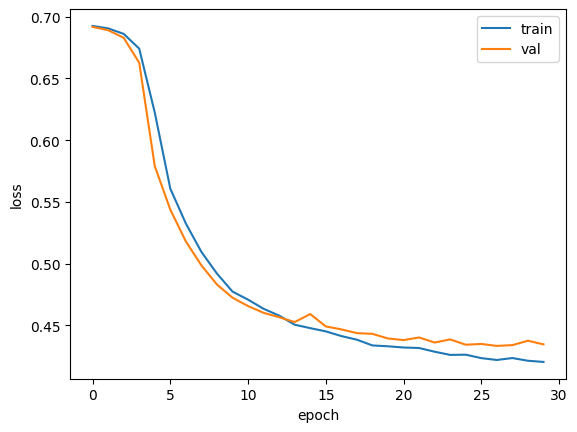

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 2개의 층을 연결하기

In [24]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_7 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_8 (LSTM)               (None, 8)                 544       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 37ms/step - loss: 0.6930 - accuracy: 0.5066 - val_loss: 0.6928 - val_accuracy: 0.5116
Epoch 2/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6923 - accuracy: 0.5448 - val_loss: 0.6917 - val_accuracy: 0.5426
Epoch 3/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6896 - accuracy: 0.5975 - val_loss: 0.6867 - val_accuracy: 0.5976
Epoch 4/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6731 - accuracy: 0.6441 - val_loss: 0.6513 - val_accuracy: 0.6710
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6176 - accuracy: 0.6977 - val_loss: 0.5928 - val_accuracy: 0.7094
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5774 - accuracy: 0.7136 - val_loss: 0.5581 - val_accuracy: 0.7326
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5477 - accuracy: 0.7335 - val_loss: 0.5297 - val_accuracy

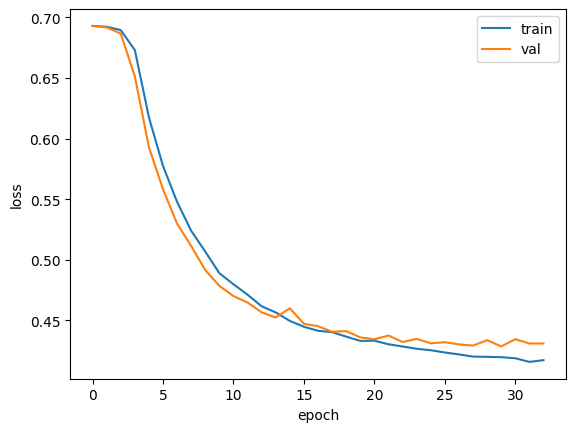

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# GPU 신경망 훈련하기

In [27]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 31ms/step - loss: 0.4124 - accuracy: 0.8160 - val_loss: 0.4414 - val_accuracy: 0.7930
Epoch 2/100
313/313 [==============================] - 4s 14ms/step - loss: 0.4123 - accuracy: 0.8159 - val_loss: 0.4378 - val_accuracy: 0.7970
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.4115 - accuracy: 0.8155 - val_loss: 0.4381 - val_accuracy: 0.7982
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.4113 - accuracy: 0.8160 - val_loss: 0.4406 - val_accuracy: 0.7956
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.4110 - accuracy: 0.8177 - val_loss: 0.4373 - val_accuracy: 0.7988
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.4110 - accuracy: 0.8159 - val_loss: 0.4377 - val_accuracy: 0.7966
Epoch 7/100
313/313 [==============================] - 5s 16ms/step - loss: 0.4109 - accuracy: 0.8176 - val_loss: 0.4365 - val_accuracy

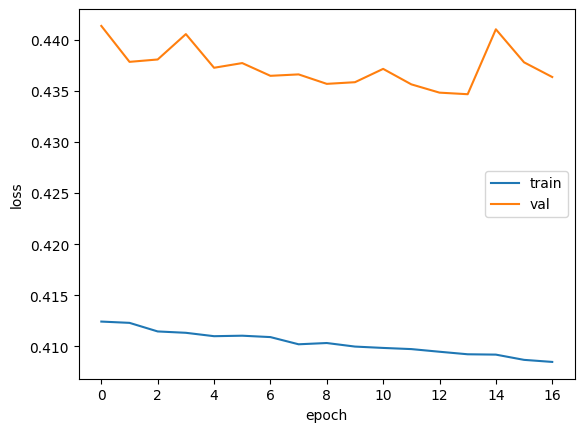

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 마무리 성능 계산

In [31]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 6s 6ms/step - loss: 0.4255 - accuracy: 0.8006


[0.42549628019332886, 0.8006399869918823]